<H1>Лабораторная работа №2</H1>

<H3>Ким Д.А. 5130901/10201</H3>

<H3>Упражнение 2.2</H3>
Создадим SawtoothSignal, который наследуется от сигнал. Сначал он линейно поднимается от -1 до 1, а затем падает до -1 и вновь повторяет линейный рост.

In [34]:
import thinkdsp
import math
import numpy as np
class SawtoothSignal(thinkdsp.Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / thinkdsp.PI2
        frac, _=np.modf(cycles)
        ys = self.amp*2*thinkdsp.unbias(frac)
        return ys

Посмотрим как выглядит график частоты

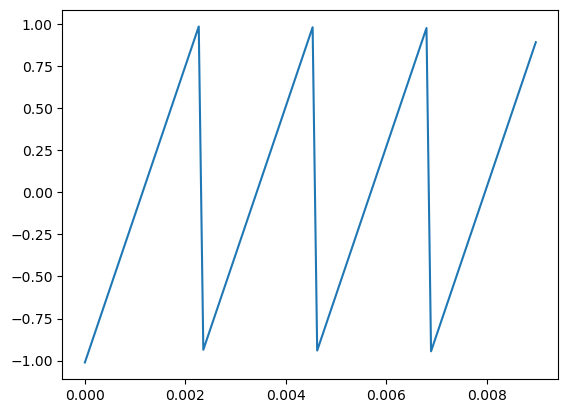

In [35]:
signal = SawtoothSignal()
duration = signal.period*4
sawtoothWave=signal.make_wave(duration, 0)
sawtoothWave.plot()

Вычислим спектр этого сегмента.

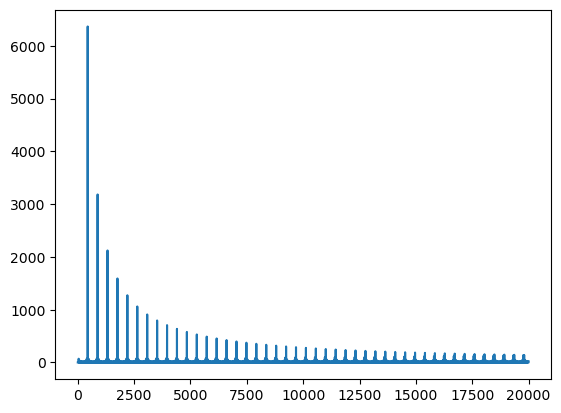

In [37]:
spectrum = SawtoothSignal().make_wave(duration=0.5, framerate=40000).make_spectrum()
spectrum.plot()

Амплитуда падает процорционально частоте, и пилообразный сигнал содержит как четные, так и нечетные гармоники.

<H3>Упражнение 2.3</H3>

Создадим прямоугольный сигнал частотой 1100 Гц и вычислим его спектр с выборками 10000 кадров в секунду. Также построим этот спектр.

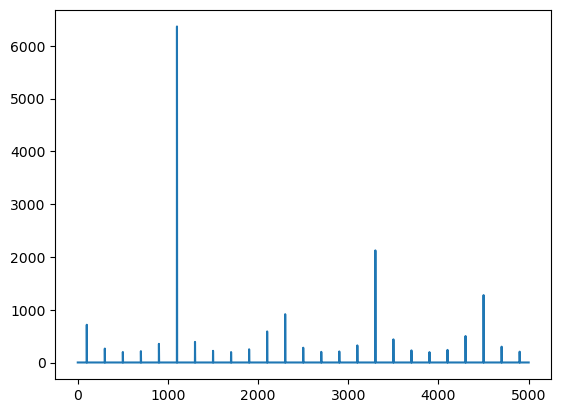

In [47]:
sqSignal = thinkdsp.SquareSignal(1100)
sqWave = sqSignal.make_wave(framerate=10000)
sqSpectrum = sqWave.make_spectrum()
sqSpectrum.plot()
sqWave.make_audio()

Гармоники должны быть в частотах нечетно кратных частоте сигнала. Как мы видим пики на 1100 и 3300 оказались там, где мы ожидали. Однако пик на 5500 совмещен с гармоникой на 4500. Это можно услышать даже на записи. Звук не гармоничен и переход частот, который бы четче прослеживался при, например, частоте кадров в 100000, не слышен и как бы смешивается. Вместо высокого звука мы получаем глухой агрессивный шум в перемесь с изначальным звуком.

<H3>Упражнение 2.4</H3>

Создадим треугольный сигнал частотой 440 Гц и wave длительностью в 0.1 секунду. Создадим его спектр и изменим амплитуду частоты 0 на 100. Далее проверим как это повлияет на сигнал.

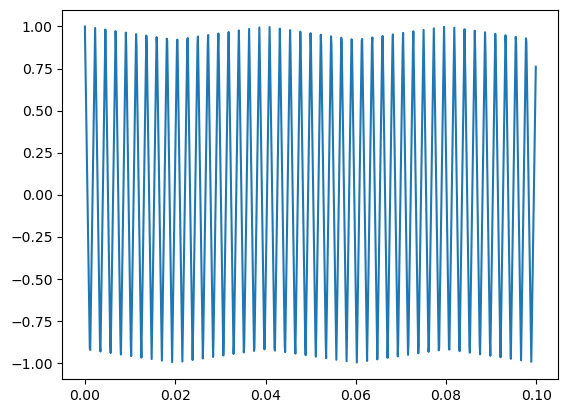

In [54]:
trSignal = thinkdsp.TriangleSignal(freq=440)
trWave = trSignal.make_wave(duration=0.1)
trSpectrum = trWave.make_spectrum()
trWave.make_audio()
trWave.plot()

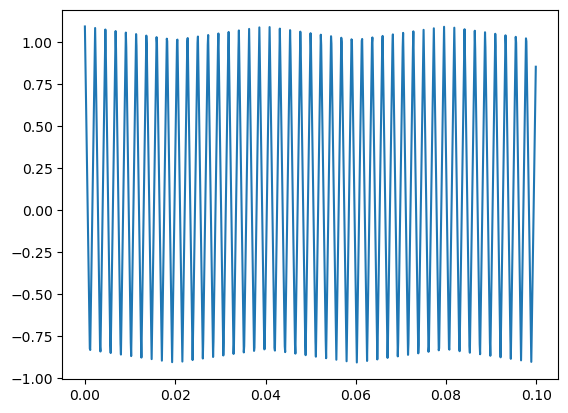

In [55]:
trSpectrum.hs[0] = 100
newWave = trSpectrum.make_wave()
newWave.make_audio()
newWave.plot()

И на слух и визульно на графике никаких изменений не произошло. Ничего удивительного, так как мы изменили компонент у которого частота 0. Очевидно, что если частота 0, то и никакого звука и никакого влияния на волну не будет. 

<H3>Упражнение 2.5</H3>

Напишем функцию, которая принимает spectrum и делит все его hs на соотвествующие fs. Проверим его на треугольном сигнале.

In [59]:
def div_spec(spec):
    spec.hs /= spec.fs
    spec.hs[0] = 0

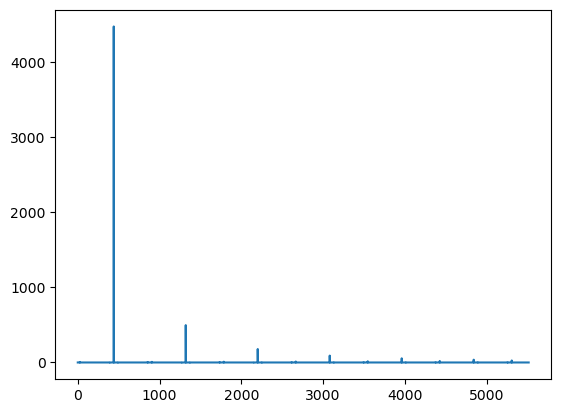

In [63]:
testSpec = thinkdsp.TriangleSignal().make_wave().make_spectrum()
testSpec.plot()
testSpec.make_wave().make_audio()

C:\Users\kanea\AppData\Local\Temp\ipykernel_20068\4063549489.py:2: RuntimeWarning: divide by zero encountered in divide
  spec.hs /= spec.fs
C:\Users\kanea\AppData\Local\Temp\ipykernel_20068\4063549489.py:2: RuntimeWarning: invalid value encountered in divide
  spec.hs /= spec.fs


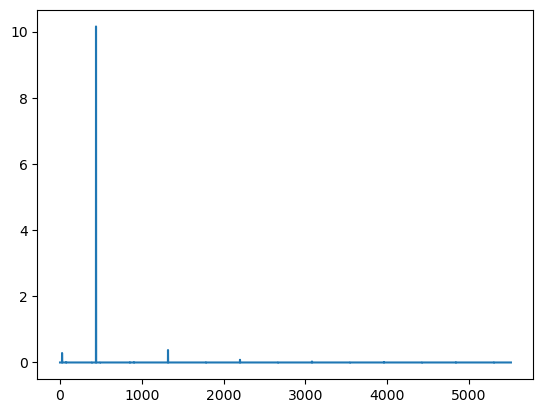

In [64]:
div_spec(testSpec)
testSpec.plot()
testSpec.make_wave().make_audio()

Как мы видим, наша функция фильтрует высокие частоты, так как чем больше частота чем больше уменьшается амплитуда. Из-за этого второй аудио файл звучит ниже, но чище, т.к. множество звуков с низкой амплитудой сильно уменьшаются и их больше не слышно.

<H3>Упражнение 2.6</H3>

Создадим сигнал, который имеет как четные, так и нечетные гармоники, но гармоники которого уменьшаются пропорицонально квадрату частоты. Получим ее суммированием двух треугольных сигналов, второй из которых будет иметь ту же частоту но смещение на 440 и амплитуду меньше в 4 раза, чтобы сохранить квадратичную зависимость амплитуды от изменения частоты.

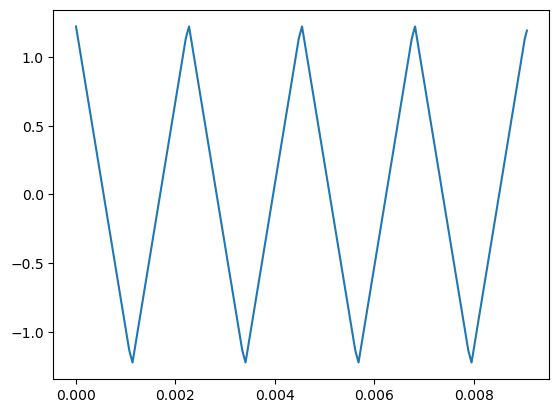

In [169]:
taskSignal = thinkdsp.TriangleSignal(440) + thinkdsp.TriangleSignal(440, amp = 0.25, offset=440)
taskWave=taskSignal.make_wave(framerate=44000)
segment = taskWave.segment(duration=taskSignal.period*4)
segment.plot()

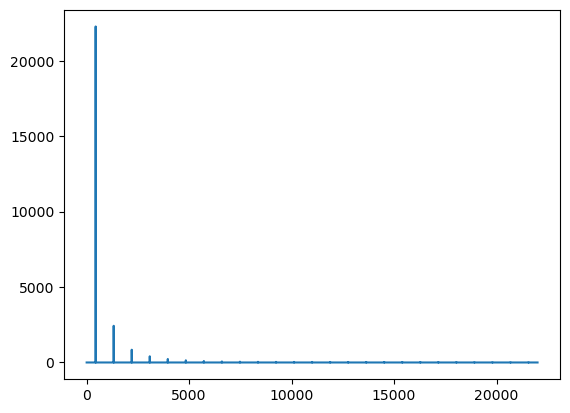

In [170]:
task_sp = taskWave.make_spectrum()
task_sp.plot()